In [4]:
import os 
import cv2
import numpy as np 
import torch as t
import torchvision 
from tqdm import tqdm
REBUILD_DATA = True

In [5]:
class HandSigns():
    IMG_SIZE = 100
    LABELS = {}
    for i in enumerate(['H','E','L','O','W','R','D','space','del','nothing']):
        LABELS['data_set/asl_alphabet_train'+'/'+i[1]]=i[0]
    training_data = []


    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(29)[self.LABELS[label]]])
 
                    except Exception as e:
                        print(label, f, str(e))
            np.random.shuffle(self.training_data)
            np.save('initial_data.npy',self.training_data)

            


In [6]:
if REBUILD_DATA:
    ASL_DATA = HandSigns()
    ASL_DATA.make_training_data()

  5%|▍         | 142/3000 [00:00<00:02, 1414.69it/s]

data_set/asl_alphabet_train/H


100%|██████████| 3000/3000 [00:01<00:00, 1651.36it/s]
/home/bahawal/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
  6%|▌         | 167/3000 [00:00<00:01, 1668.26it/s]

data_set/asl_alphabet_train/E


  0%|          | 4/3000 [00:00<01:35, 31.27it/s]

data_set/asl_alphabet_train/L


  4%|▍         | 115/3000 [00:00<00:02, 1148.51it/s]

data_set/asl_alphabet_train/O


  3%|▎         | 97/3000 [00:00<00:03, 964.05it/s]

data_set/asl_alphabet_train/W


  4%|▍         | 127/3000 [00:00<00:02, 1265.88it/s]

data_set/asl_alphabet_train/R


  3%|▎         | 94/3000 [00:00<00:03, 939.45it/s]

data_set/asl_alphabet_train/D


  4%|▍         | 116/3000 [00:00<00:02, 1158.15it/s]

data_set/asl_alphabet_train/space


  3%|▎         | 81/3000 [00:00<00:03, 804.54it/s]

data_set/asl_alphabet_train/del


  4%|▎         | 105/3000 [00:00<00:02, 1046.72it/s]

data_set/asl_alphabet_train/nothing


100%|██████████| 3000/3000 [00:01<00:00, 1754.82it/s]


In [7]:
training_data = np.load('initial_data.npy',allow_pickle=True)

In [8]:
len(training_data)

30000

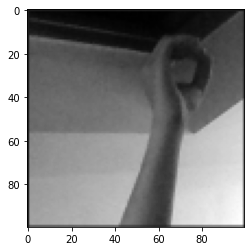

In [10]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap="gray")
plt.show()


In [ ]:
LABELS